In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/uberdrives/My Uber Drives - 2016.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


**DATA CLEANING & PREPROCESSING**

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [7]:
df.shape

(1156, 7)

In [10]:
# Remove the summary/totals row at the end
df = df.iloc[:-1].copy()

# Fix column names (remove *)
df.columns = [col.replace('*', '') for col in df.columns]

# Convert to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

# Fill missing PURPOSE with 'Not Specified'
df['PURPOSE'] = df['PURPOSE'].fillna('Not Specified')

In [11]:
# 3. FEATURE ENGINEERING
df['MONTH'] = df['START_DATE'].dt.month_name()
df['DAY'] = df['START_DATE'].dt.day_name()
df['HOUR'] = df['START_DATE'].dt.hour
df['DURATION_MIN'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

VISUALIZATION

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

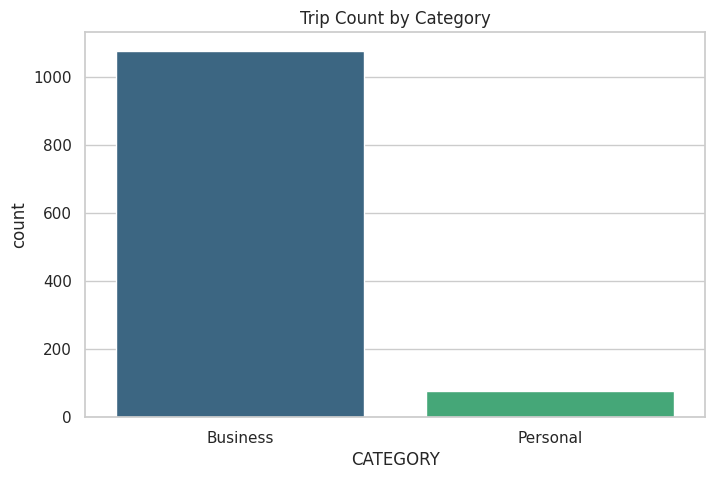

In [13]:
sns.set_theme(style="whitegrid")

# Plot 1: Trip Count by Category
plt.figure(figsize=(8, 5))
sns.countplot(x='CATEGORY', data=df, palette='viridis')
plt.title('Trip Count by Category')
plt.savefig('uber_category_count.png')

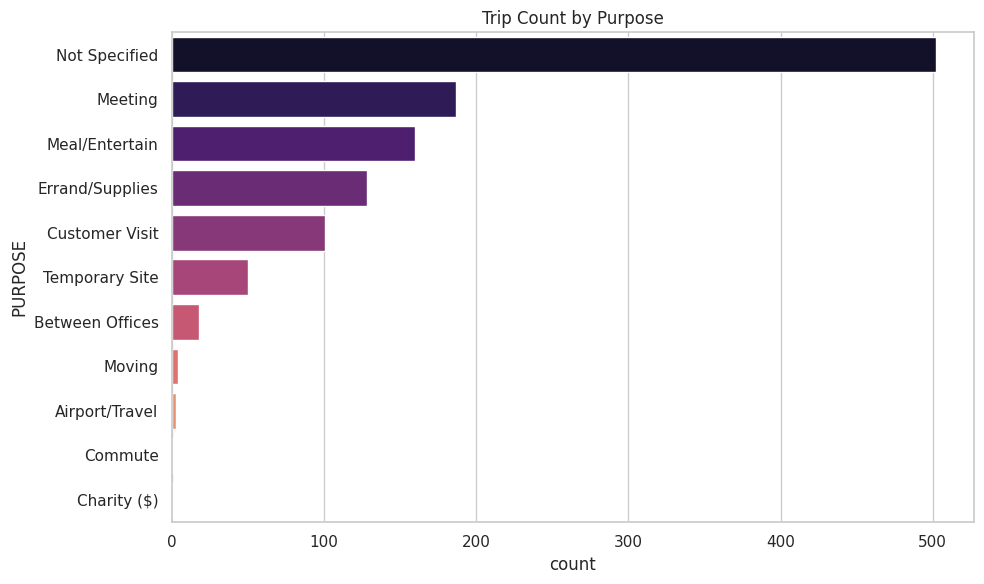

In [14]:
# Plot 2: Trip Count by Purpose
plt.figure(figsize=(10, 6))
sns.countplot(y='PURPOSE', data=df, palette='magma', order=df['PURPOSE'].value_counts().index)
plt.title('Trip Count by Purpose')
plt.tight_layout()
plt.savefig('uber_purpose_count.png')

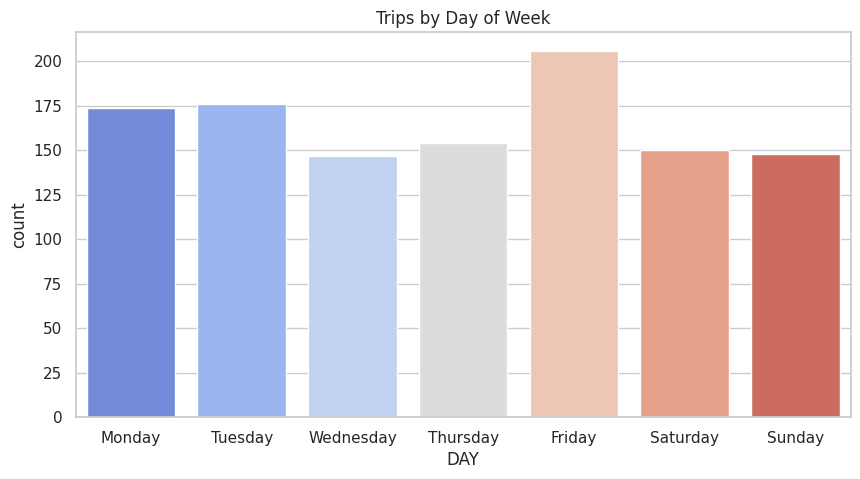

In [15]:
# Plot 3: Trips by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.countplot(x='DAY', data=df, palette='coolwarm', order=day_order)
plt.title('Trips by Day of Week')
plt.savefig('uber_trips_by_day.png')

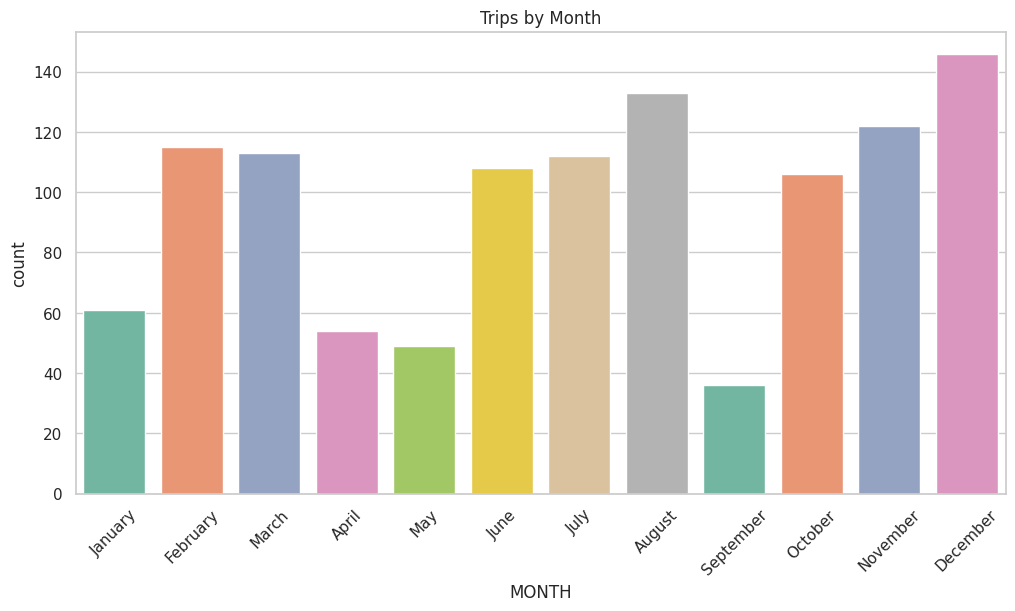

In [16]:
# Plot 4: Trips by Month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12, 6))
sns.countplot(x='MONTH', data=df, palette='Set2', order=month_order)
plt.title('Trips by Month')
plt.xticks(rotation=45)
plt.savefig('uber_trips_by_month.png')